<a href="https://colab.research.google.com/github/dianakhp26/Spy-Camera-Object-Detection/blob/main/YOLOv8_Molka_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spycam detection using YOLOv8 pre-trained model

The following report presents an implementation of the YOLOv8 pre-trained model making use of a custom dataset for hidden camera detection.

### **Steps Covered in this Report**

To train the YOLOv8 model the following steps need to be carried out:

* Install dependencies
* Load custom dataset from Roboflow
* Run YOLOv8 training
* Evaluate YOLOv8 performance
* Run YOLOv8 inference on test images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import os
if not os.path.isdir("molka3.2"):
  os.makedirs("molka3.2")

In [ ]:
%cd molka3.2

/content/gdrive/MyDrive/molka3.2


In [ ]:
!nvidia-smi

Thu Jul 25 20:20:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Install Dependencies

YOLOv8 can be installed directly via pip, this is because it is the first iteration in the YOLO series to have an official package,

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive/molka3.2


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Download Correctly Formatted Custom Data

The dataset used for this prototype was compiled manually making use of various online resources and directly taking photos of spy cameras, labeled on the online platform 'Roboflow', it contains 1300 images of these devices.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7I60qffNU9N77bb0sSr7")
project = rf.workspace("myworkspace-anl7e").project("spy-cameras")
version = project.version(4)
dataset = version.download("yolov8")

/content/gdrive/MyDrive/molka3.2/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Spy-Cameras-4 in yolov8:: 100%|██████████| 2612/2612 [00:19<00:00, 136.55it/s]


# Custom Training

The training will be carried out for 100 epochs.

In [ ]:
%cd /content/gdrive/MyDrive/molka3.2

!yolo task=detect mode=train model=yolov8s.pt data=/content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/data.yaml epochs=100 imgsz=640 plots=True

/content/gdrive/MyDrive/molka3.2
100% 21.5M/21.5M [00:00<00:00, 246MB/s]
New https://pypi.org/project/ultralytics/8.2.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_lab

# Trainning Results

Graphs to evaluate the performance of the model

In [ ]:
!ls /content/gdrive/MyDrive/molka3.2/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch6751.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch6752.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1723154603.2574ecaaf9be.2268.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	 weights
P_curve.png					    train_batch6750.jpg


/content/gdrive/MyDrive/molka3.2


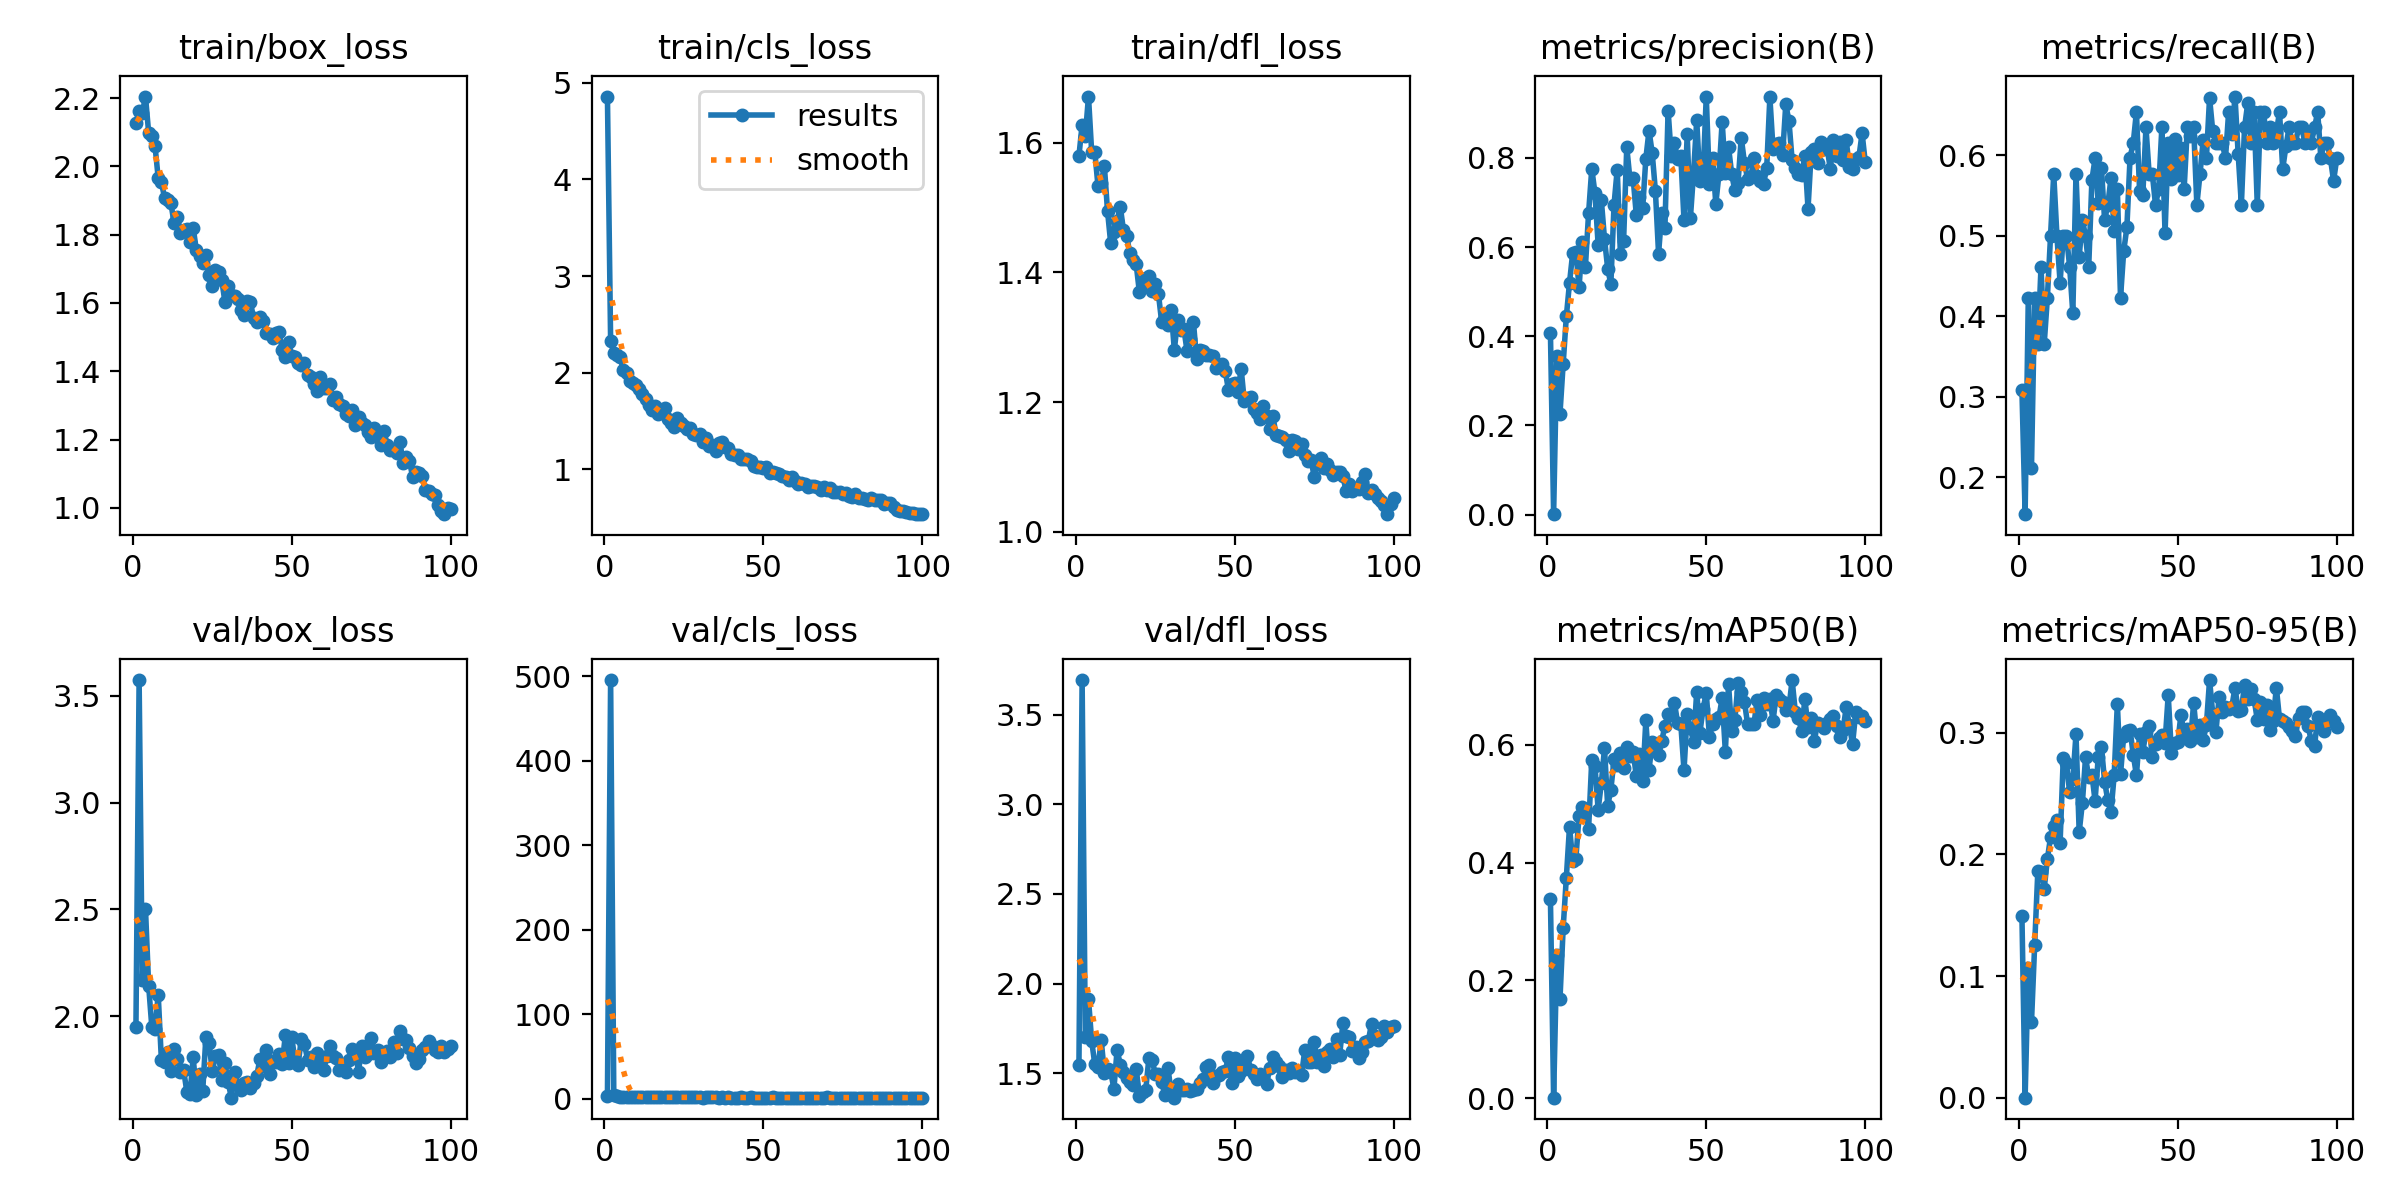

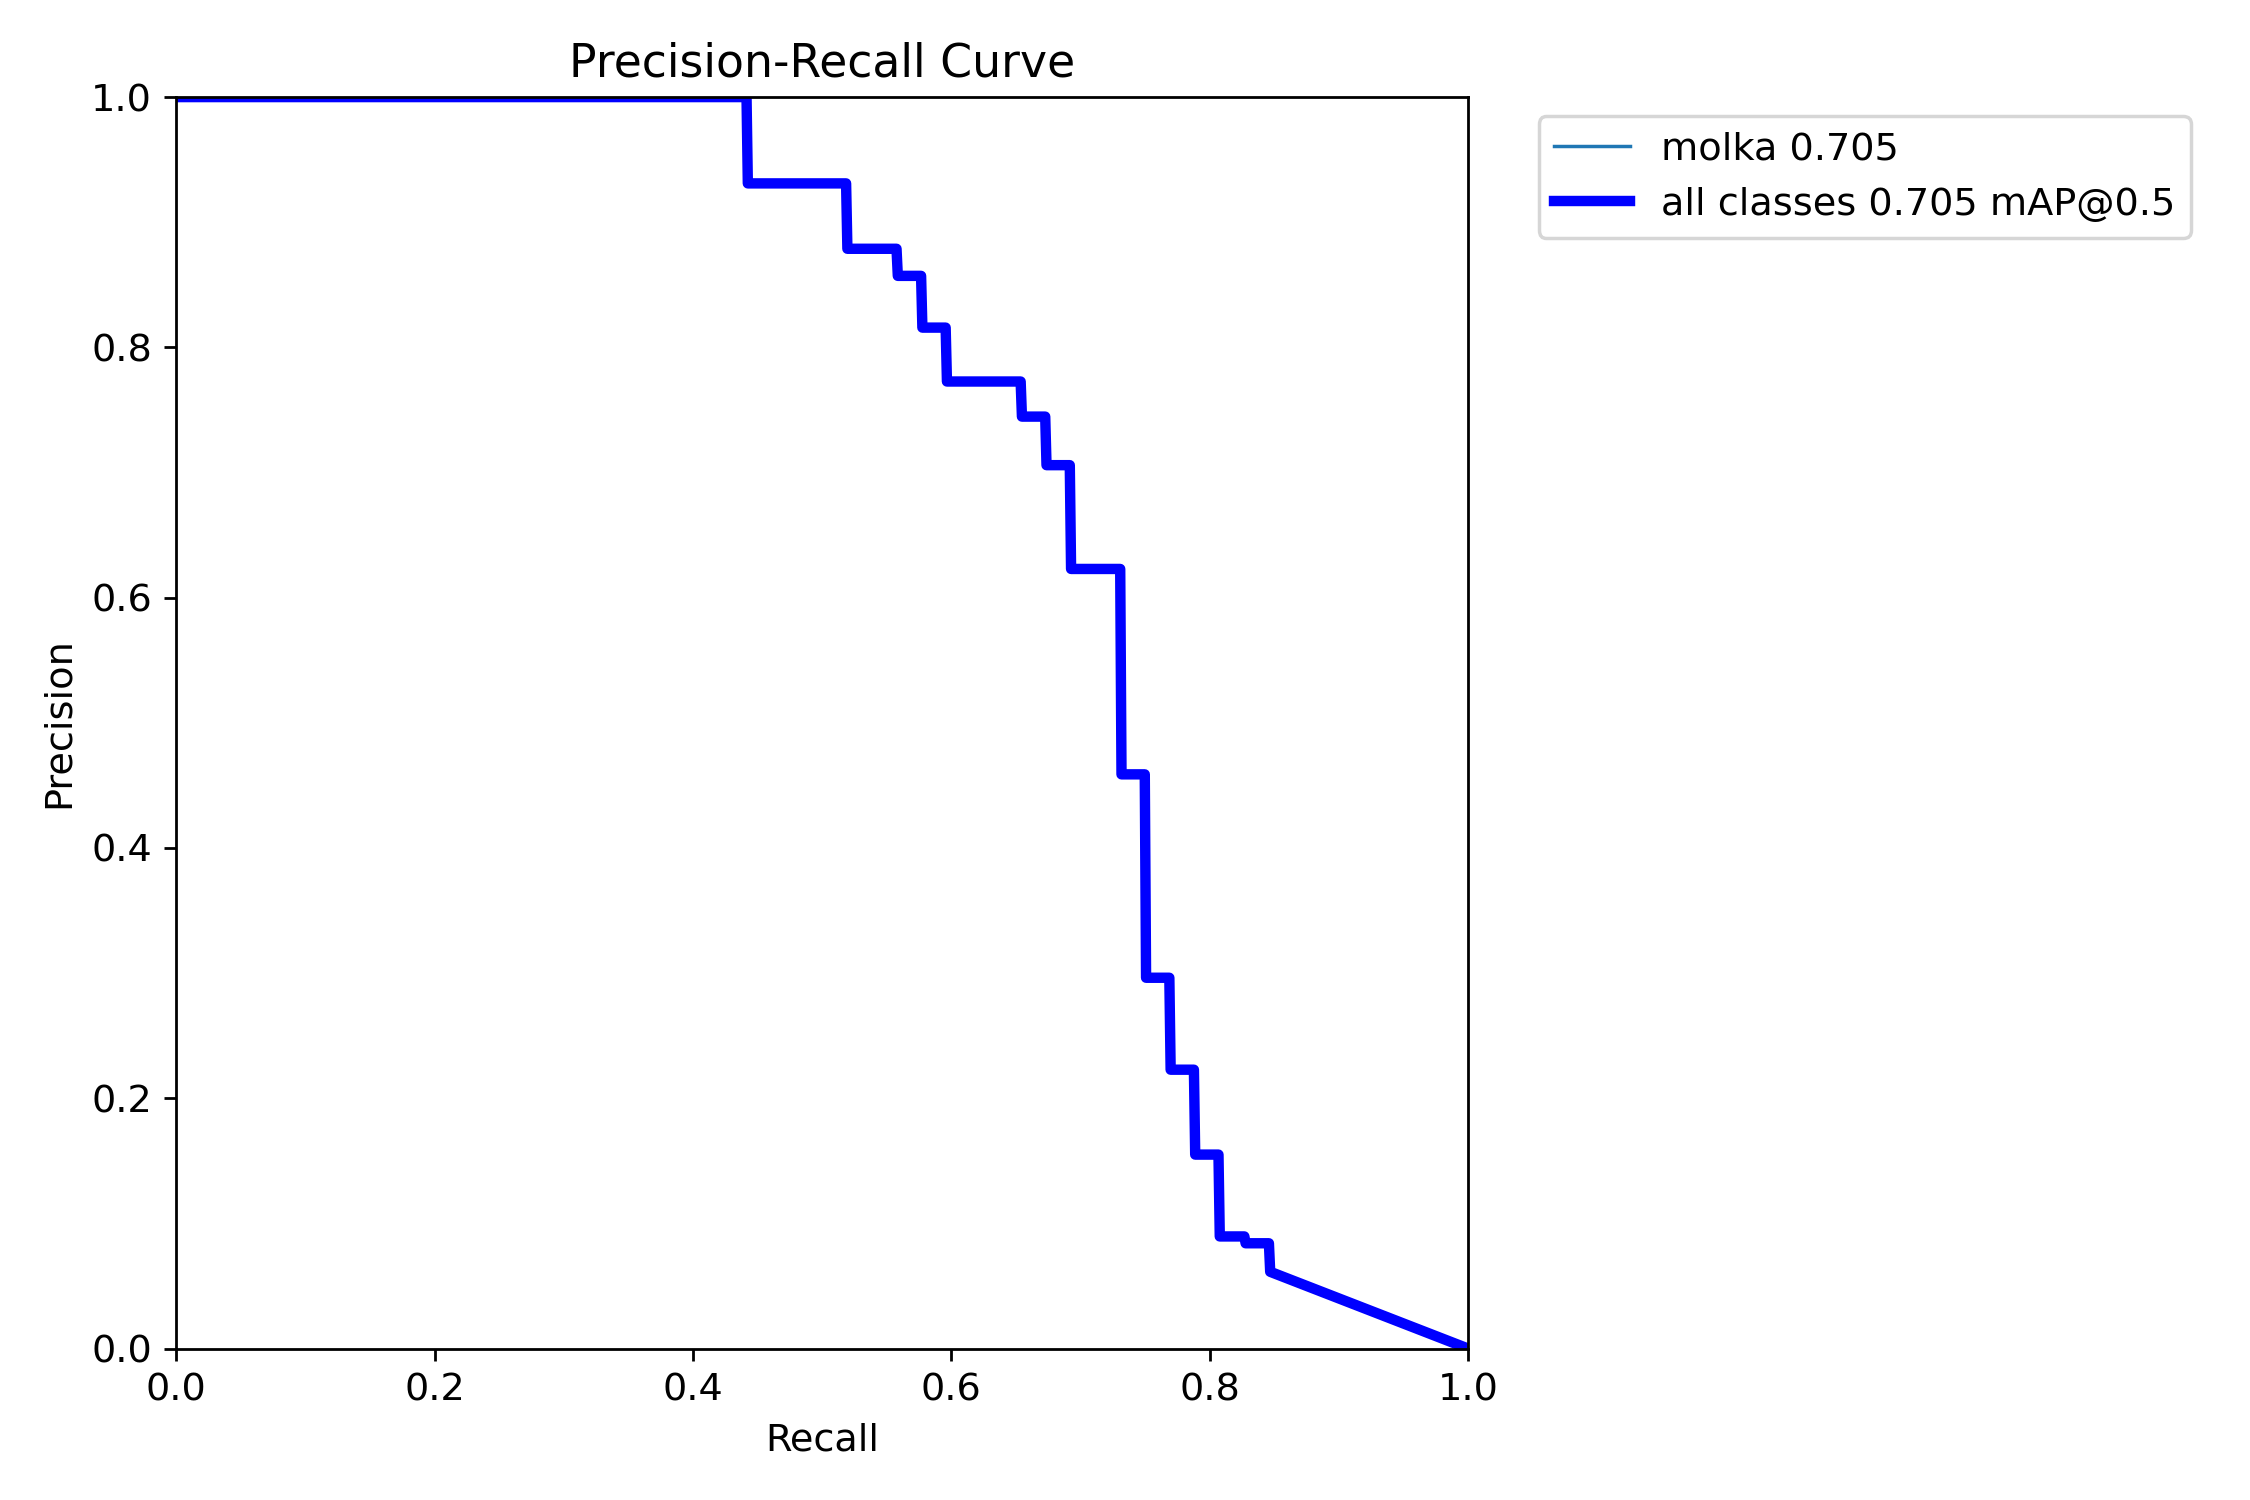

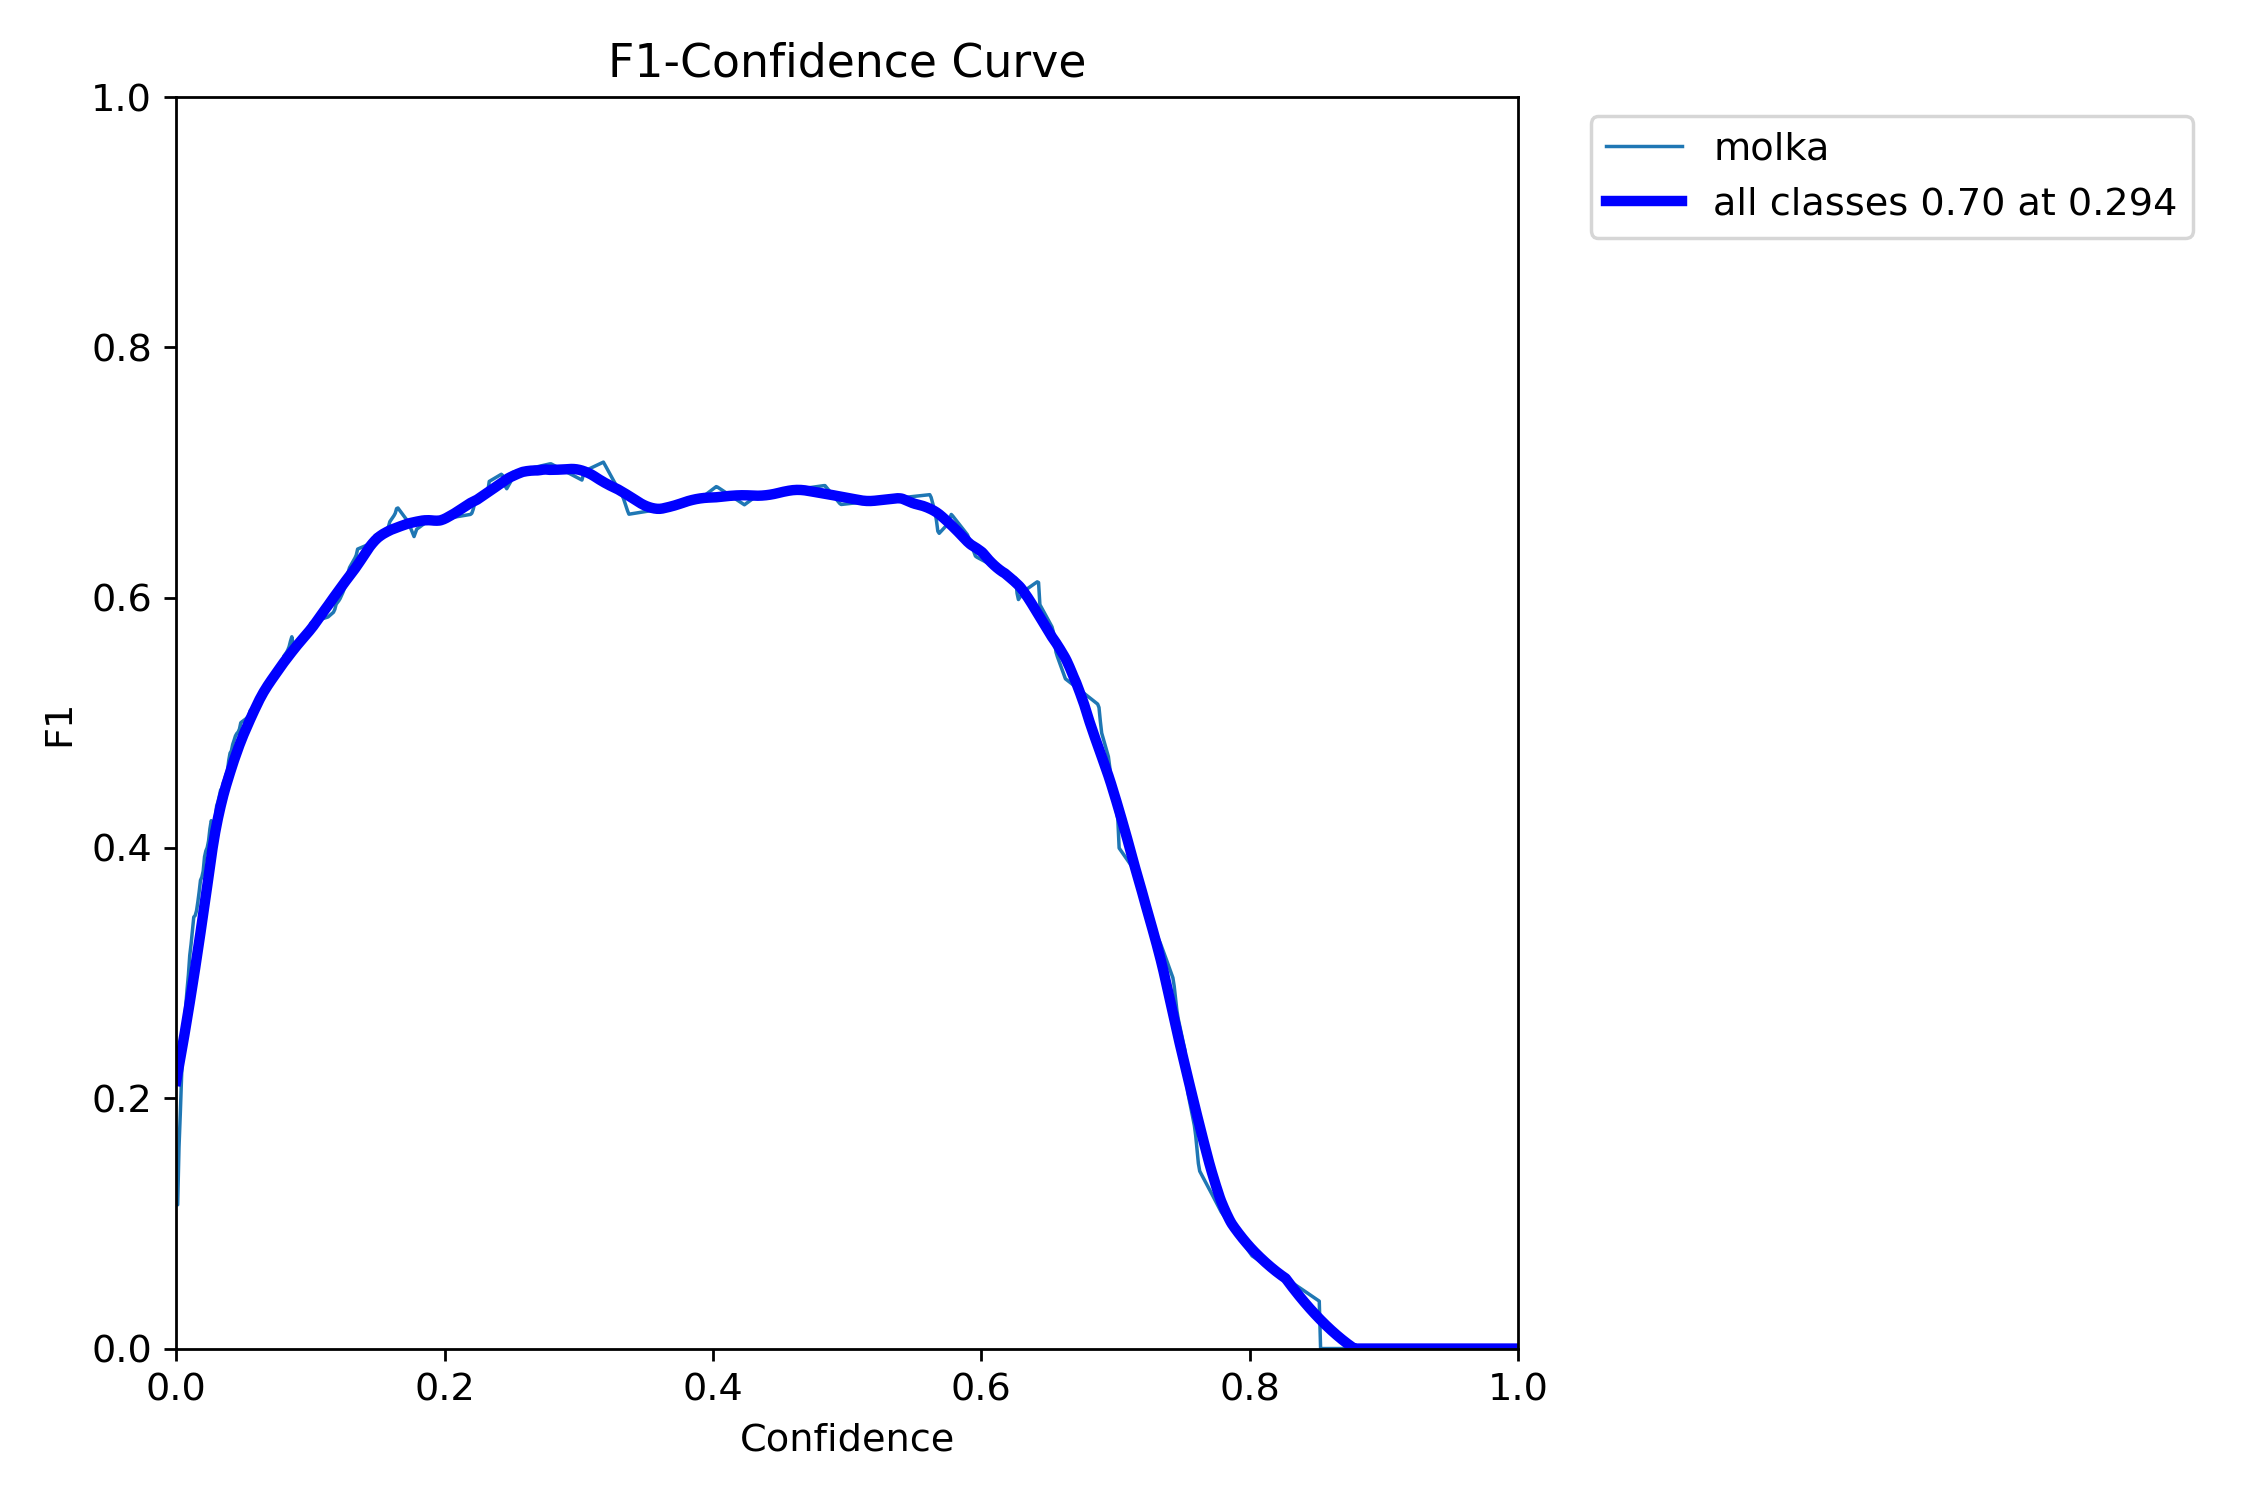

In [ ]:
%cd /content/gdrive/MyDrive/molka3.2/
from IPython.display import Image
display(Image(filename=f'/content/gdrive/MyDrive/molka3.2/runs/detect/train/results.png', width=600))
display(Image(filename=f'/content/gdrive/MyDrive/molka3.2/runs/detect/train/PR_curve.png', width=600))
display(Image(filename=f'/content/gdrive/MyDrive/molka3.2/runs/detect/train/F1_curve.png', width=600))

# Inference on test set

Using the trained model results to perform inference on the test set and evaluate its execution.

In [ ]:
%cd /content/gdrive/MyDrive/molka3.2/

!yolo task=detect mode=val model=/content/gdrive/MyDrive/molka3.2/runs/detect/train/weights/best.pt data=/content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/data.yaml

/content/gdrive/MyDrive/molka3.2
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.09it/s]
                   all         50         52      0.865      0.596      0.712      0.339
Speed: 5.9ms preprocess, 24.5ms inference, 0.0ms loss, 14.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd /content/gdrive/MyDrive/molka3.2/
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/molka3.2/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/test/images save=True

/content/gdrive/MyDrive/molka3.2
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/50 /content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/test/images/spycam-101-_jpg.rf.1bbfb71f9fa0e1a3cb6c7111fc2b9584.jpg: 640x640 (no detections), 16.3ms
image 2/50 /content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/test/images/spycam-197-_jpg.rf.f1c20132a0d87a4a35afe93327d3c35f.jpg: 640x640 (no detections), 16.4ms
image 3/50 /content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/test/images/spycam-233-_jpg.rf.f32bb124e8b74abfdd420f4a58e9de04.jpg: 640x640 (no detections), 16.4ms
image 4/50 /content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/test/images/spycam-238-_jpg.rf.8de6030240ef423508fdad2ea06cde9a.jpg: 640x640 1 molka, 16.3ms
image 5/50 /content/gdrive/MyDrive/molka3.2/datasets/Spy-Cameras-4/test/images/spycam-249-_jpg.rf.46bb4e1bbf7eea238adee7de3ef05e6f.jp

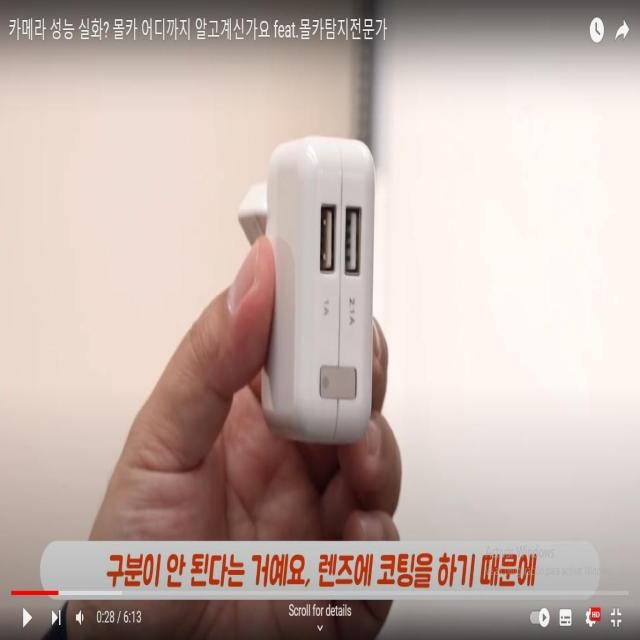

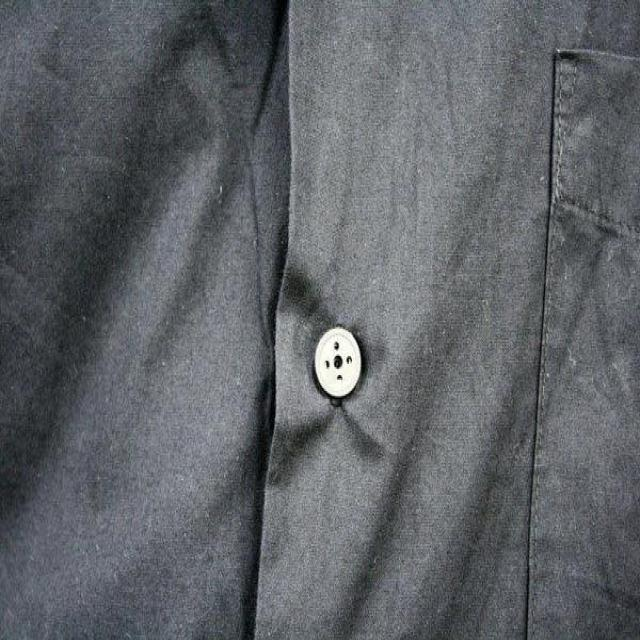

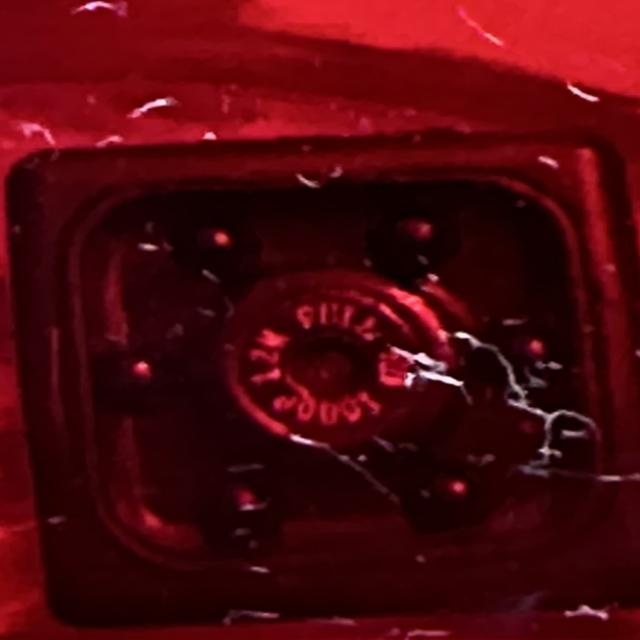

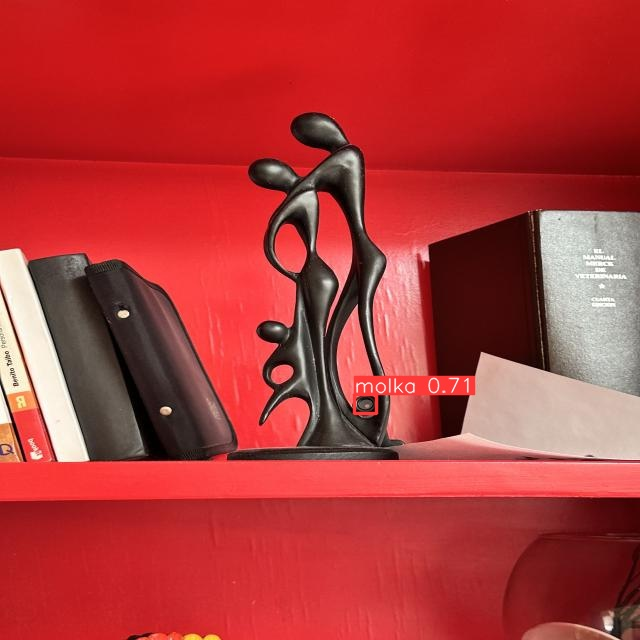

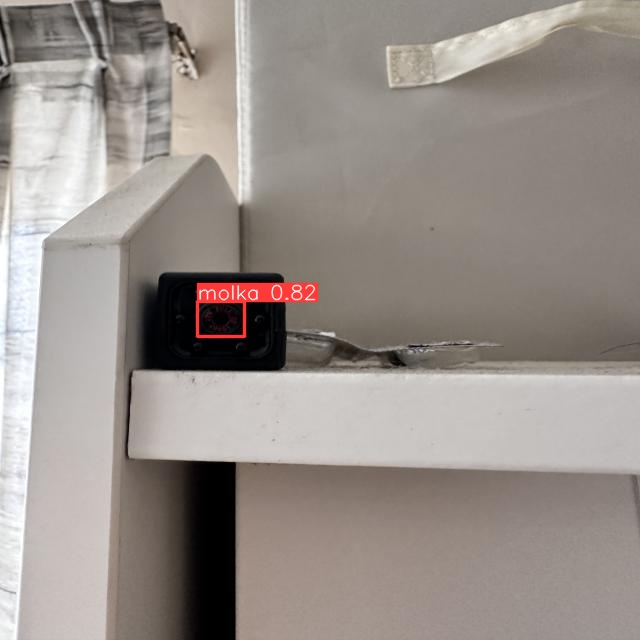

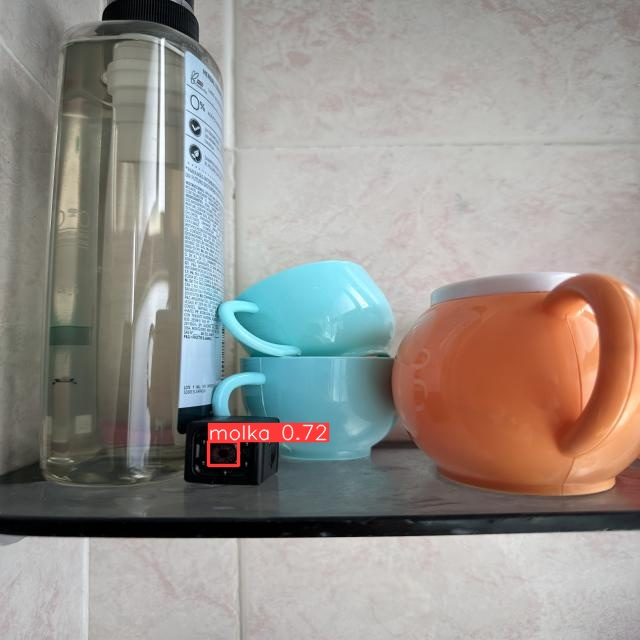

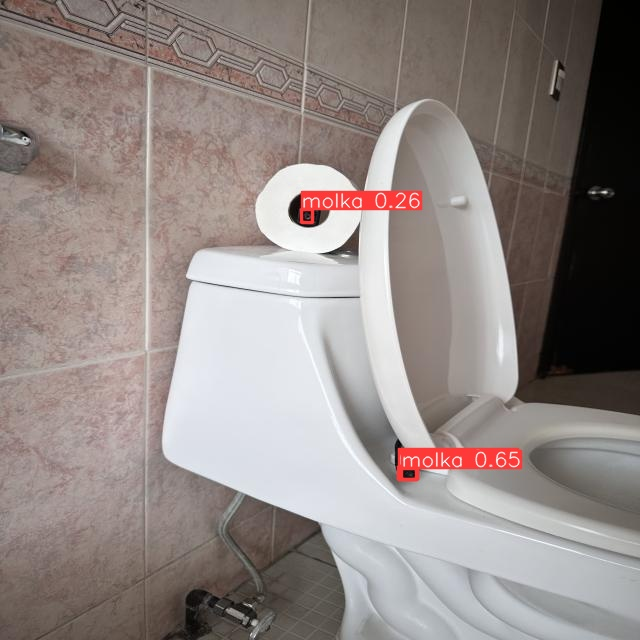

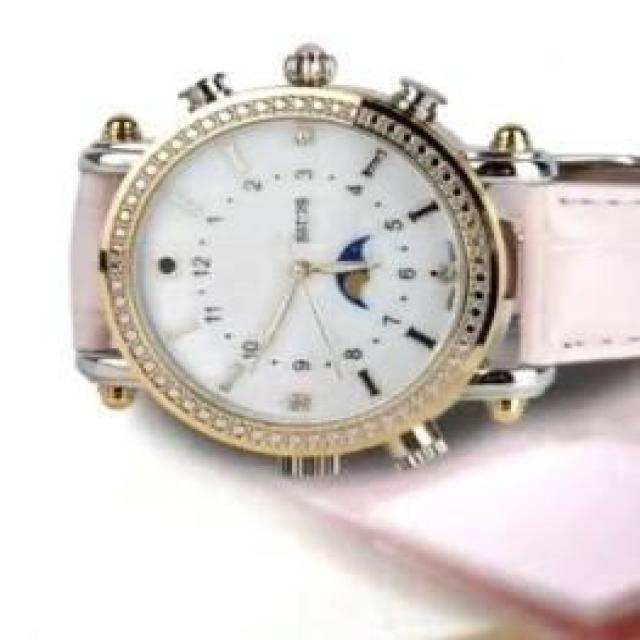

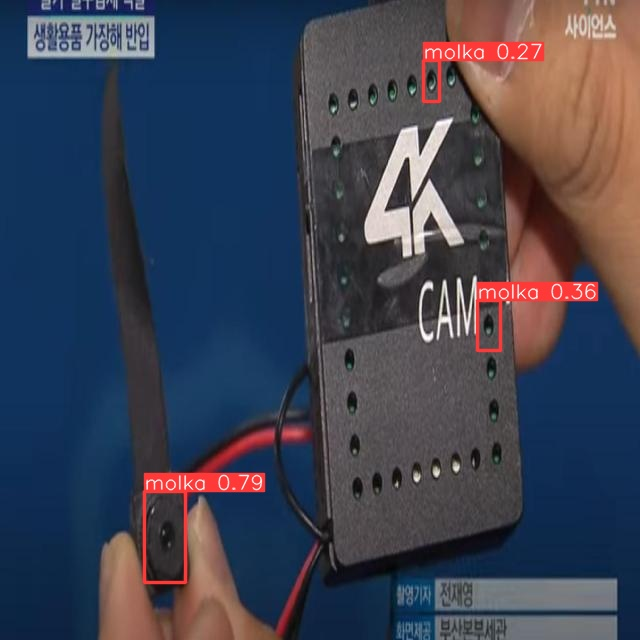

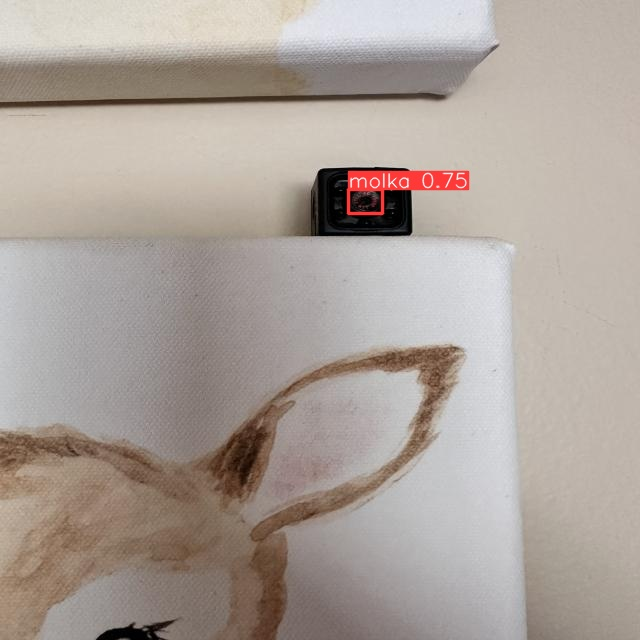

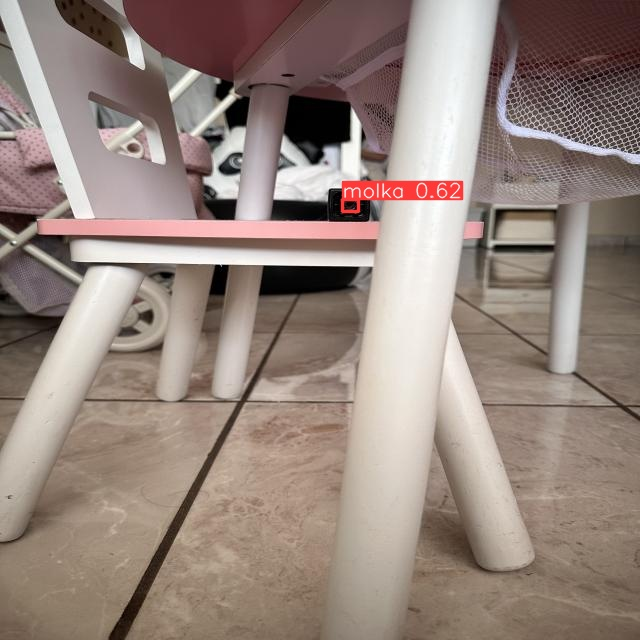

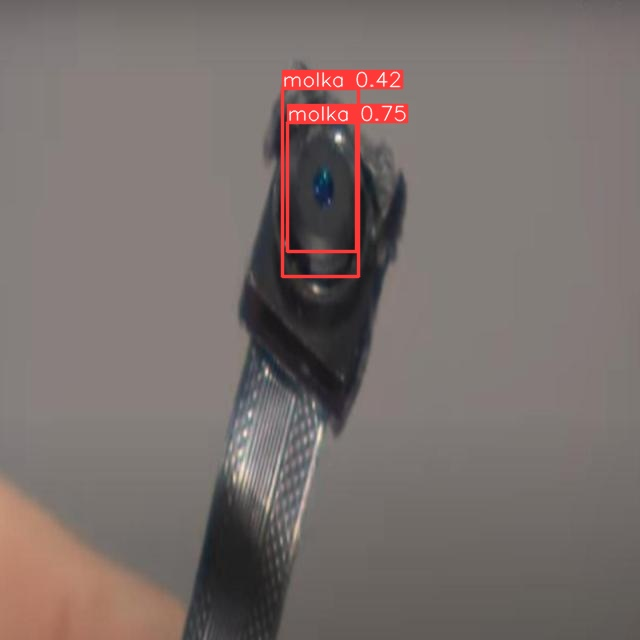

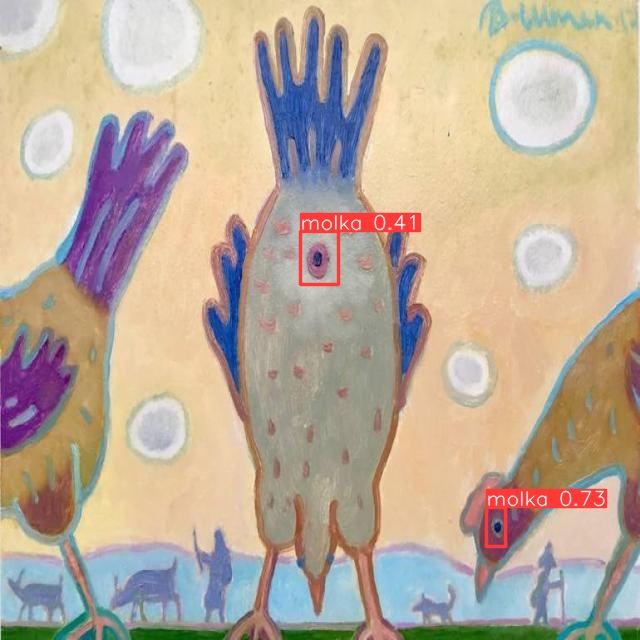

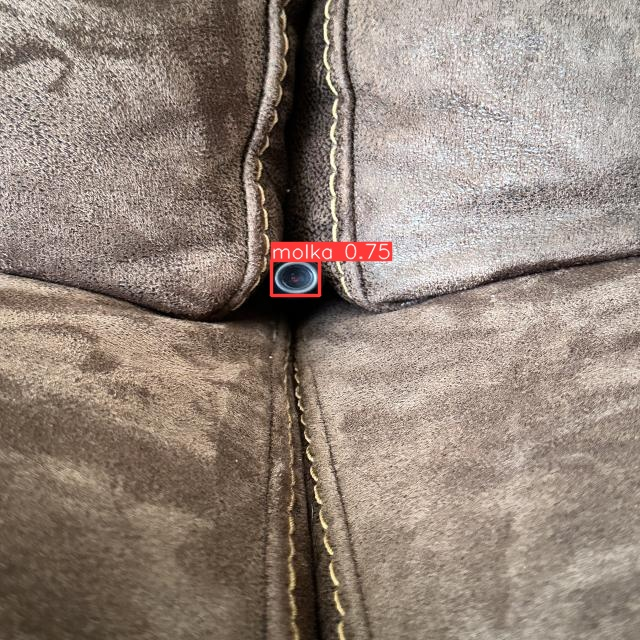

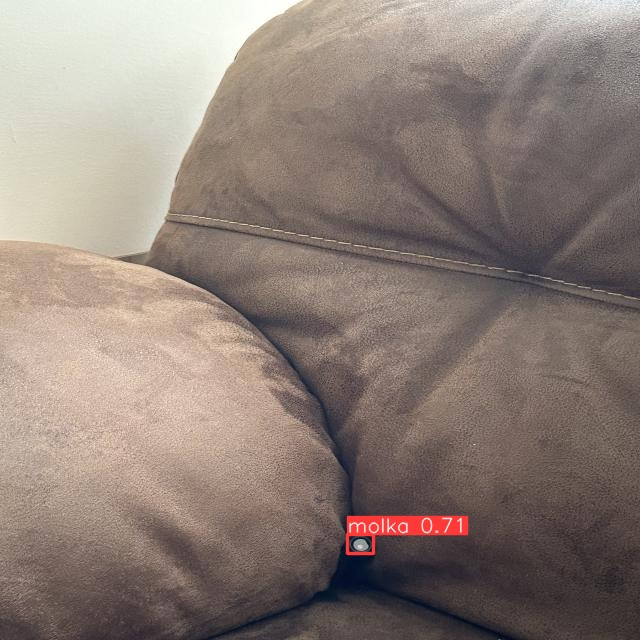

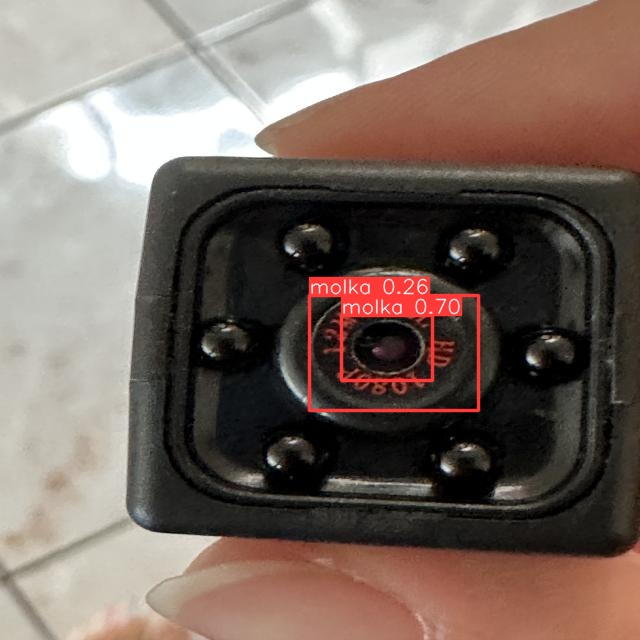

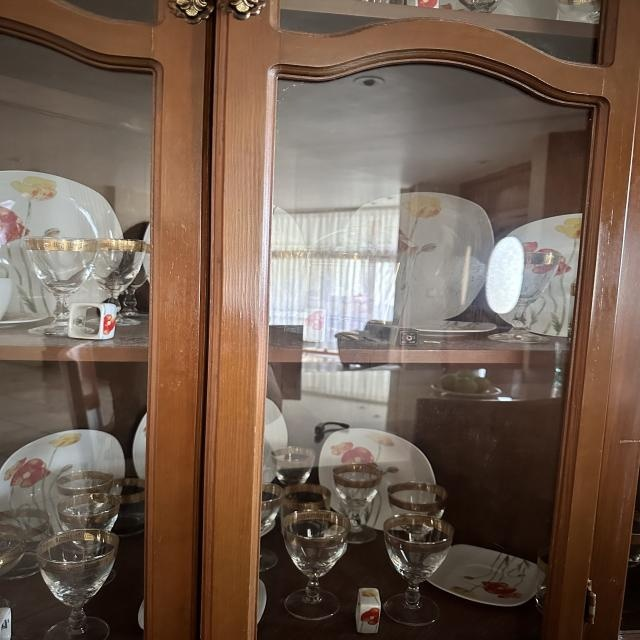

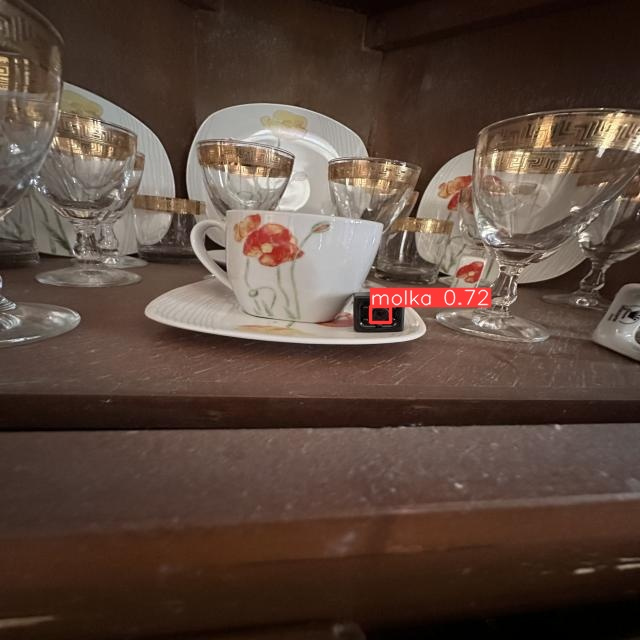

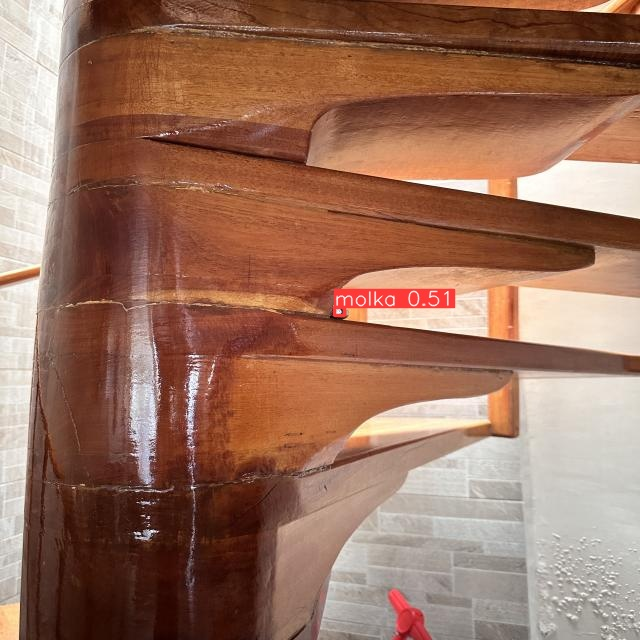

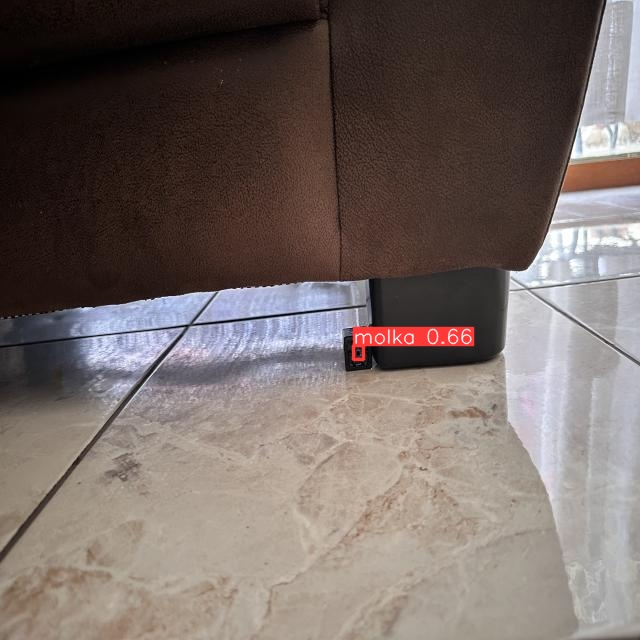

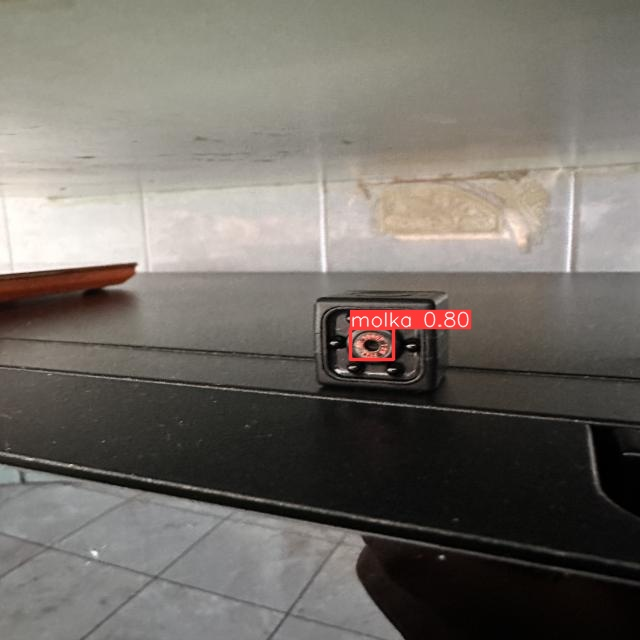

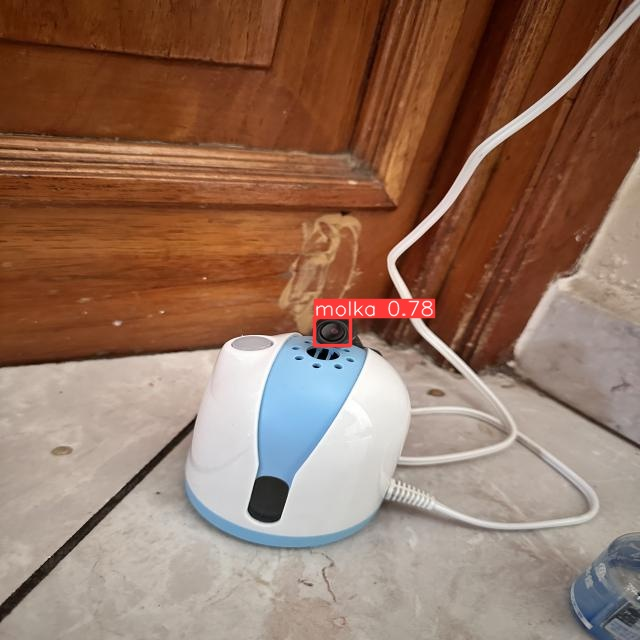

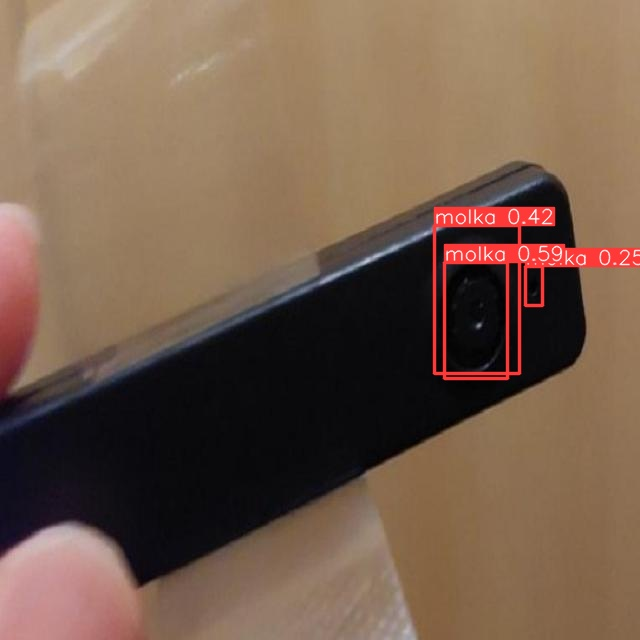

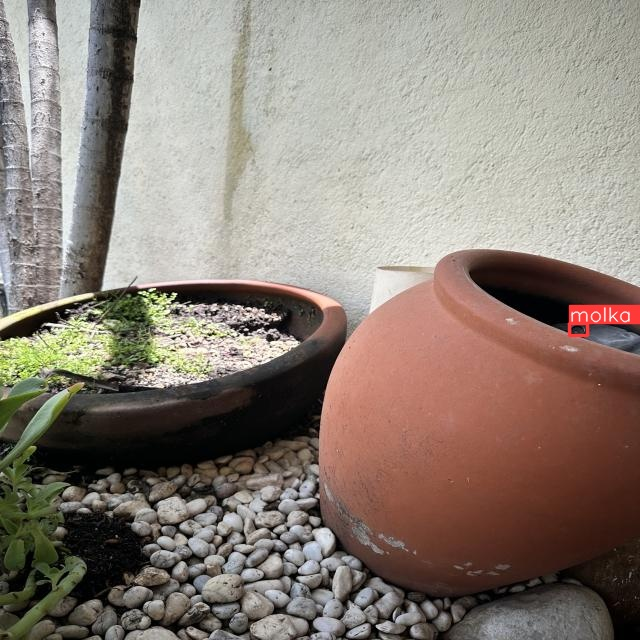

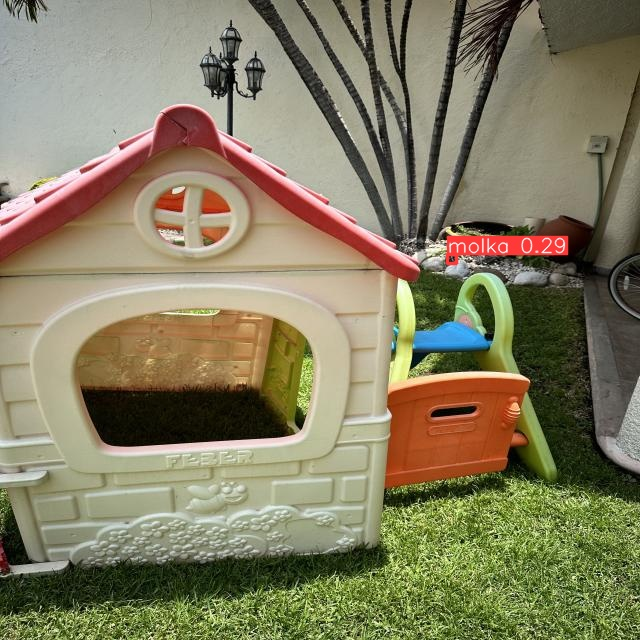

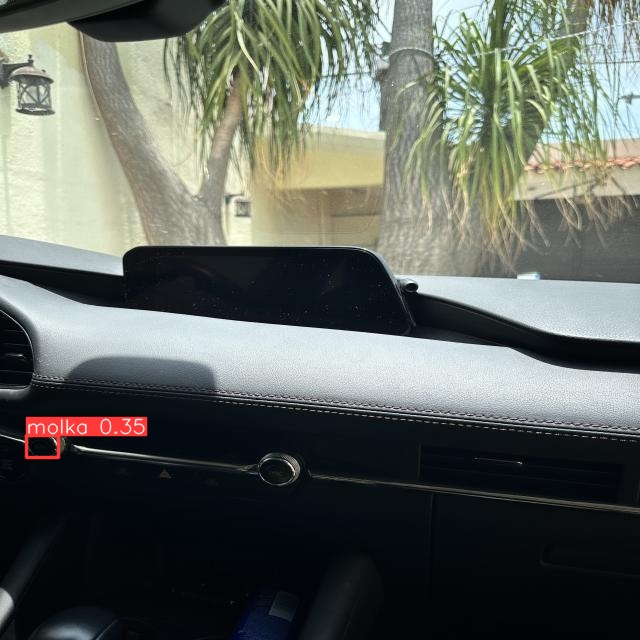

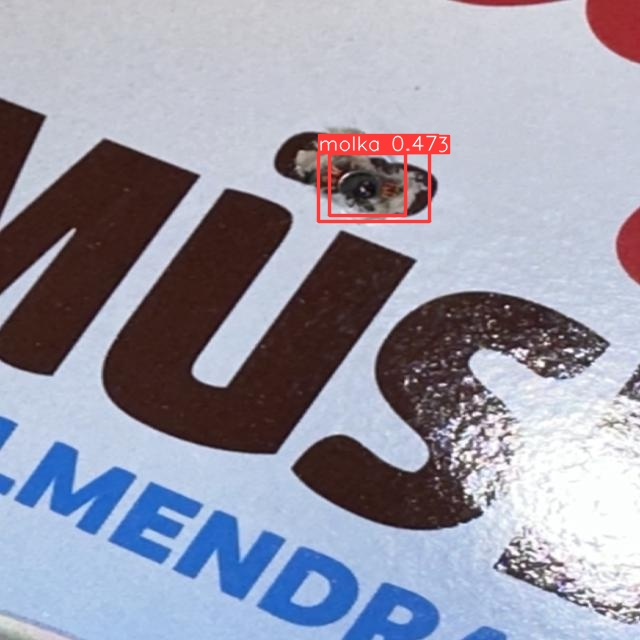

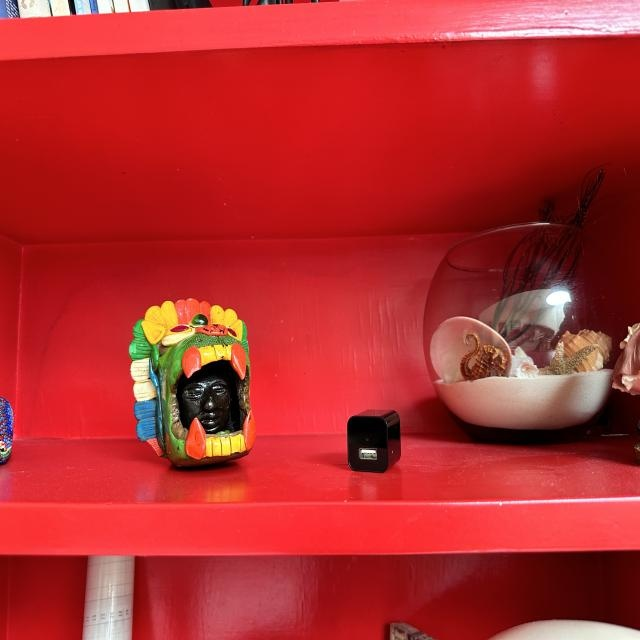

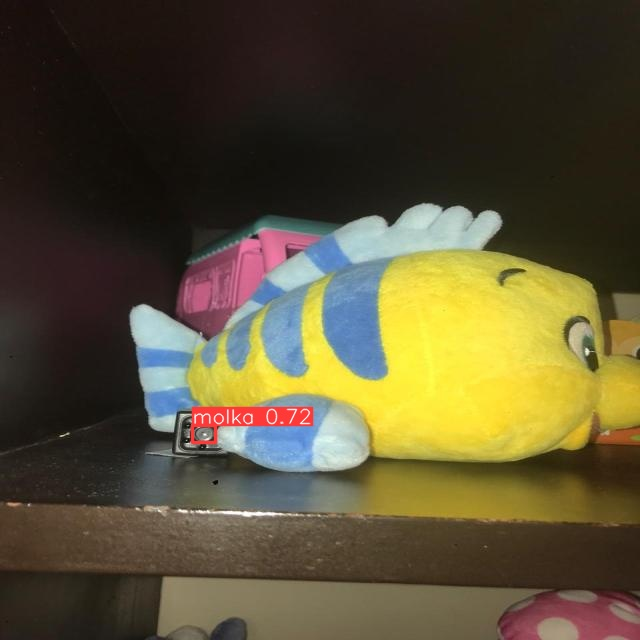

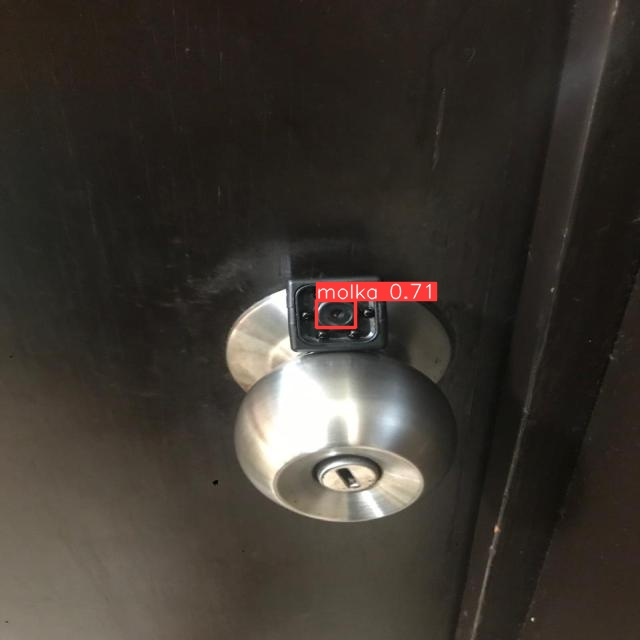

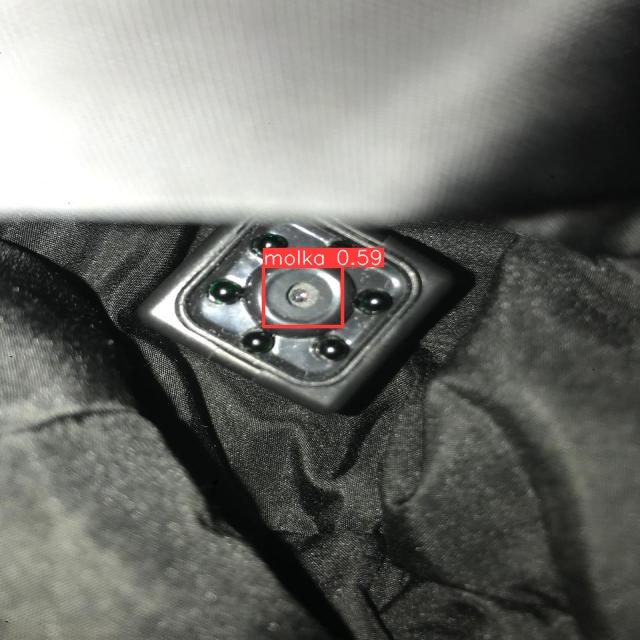

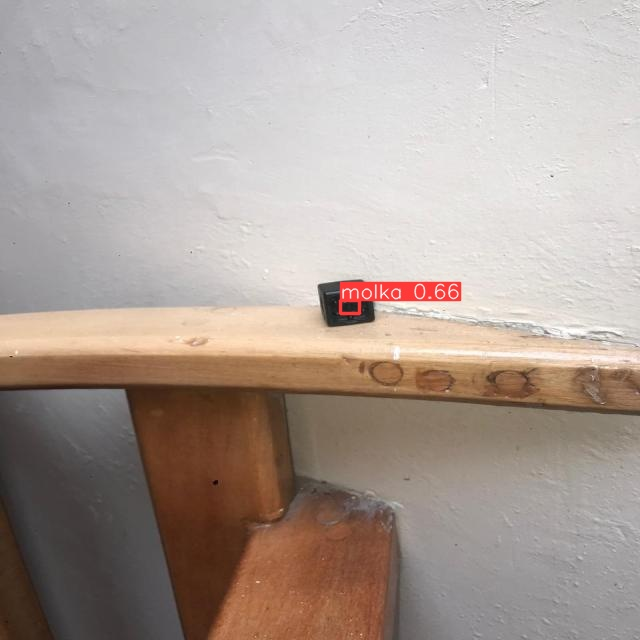

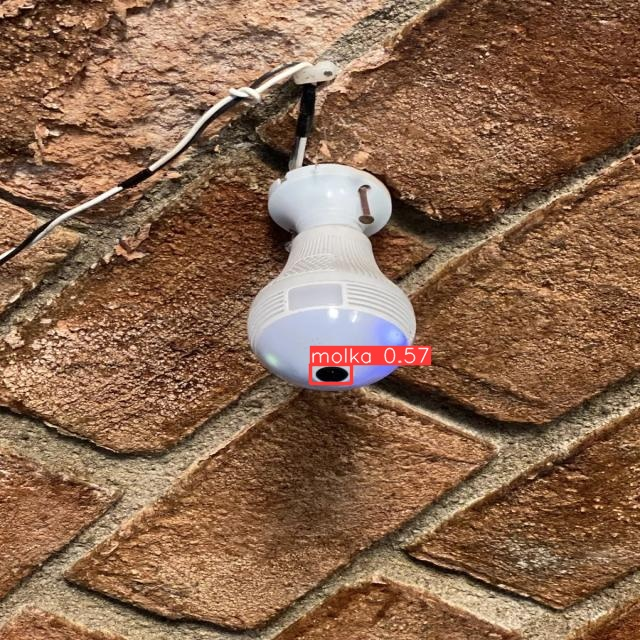

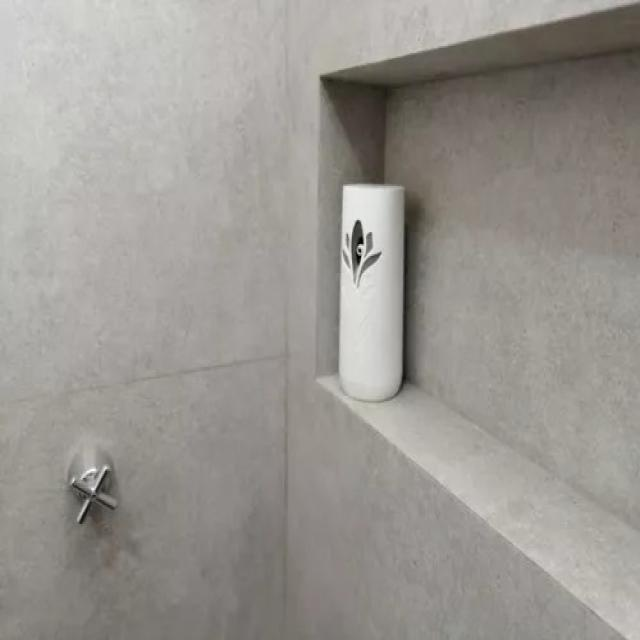

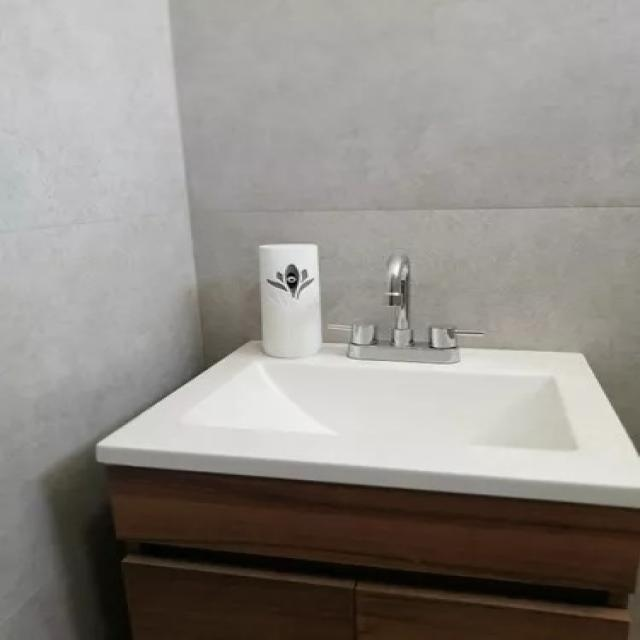

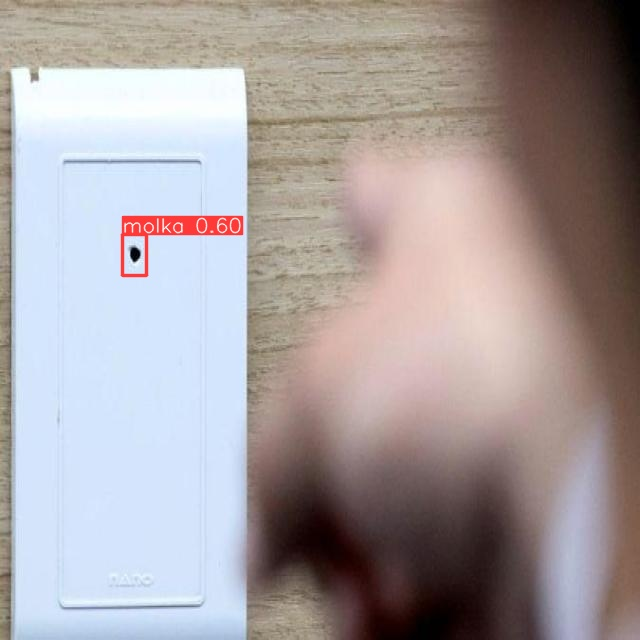

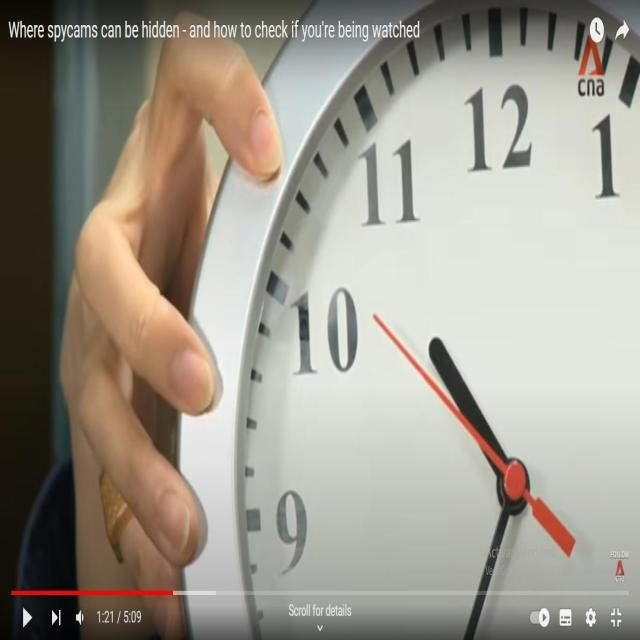

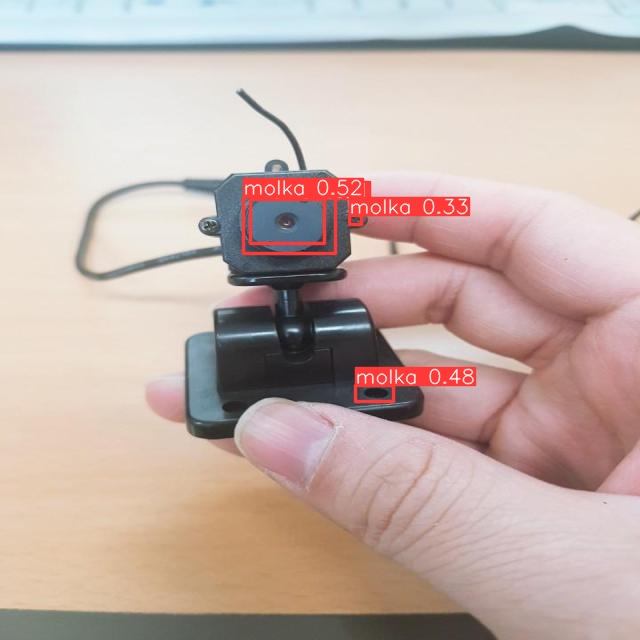

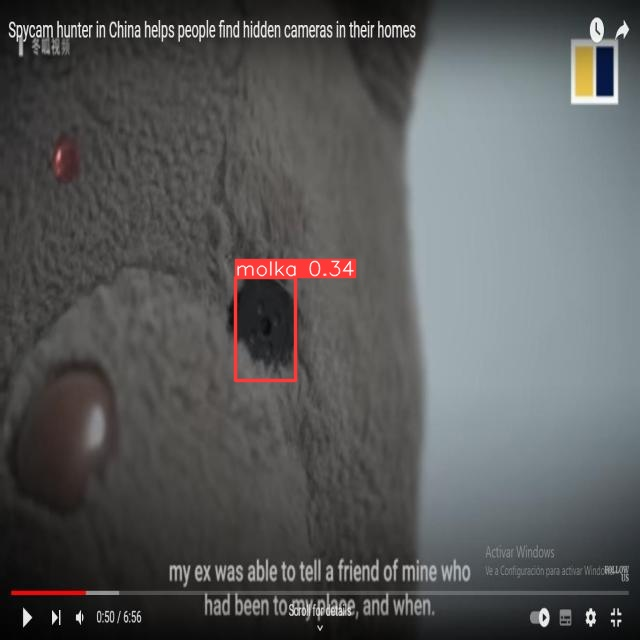

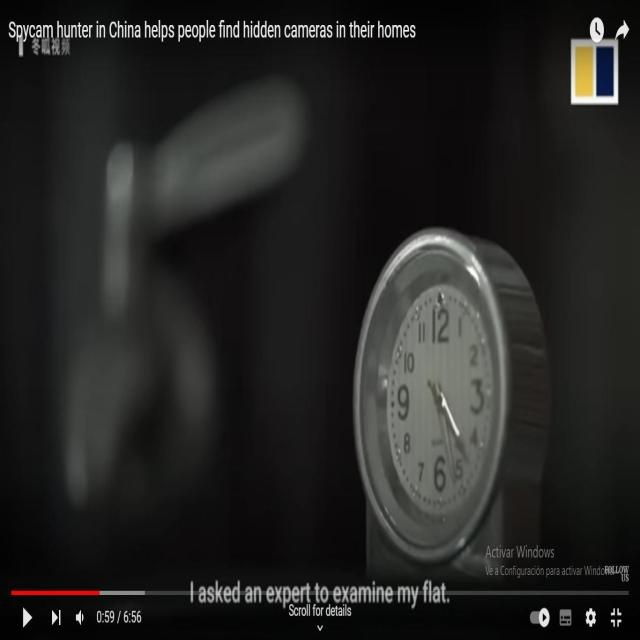

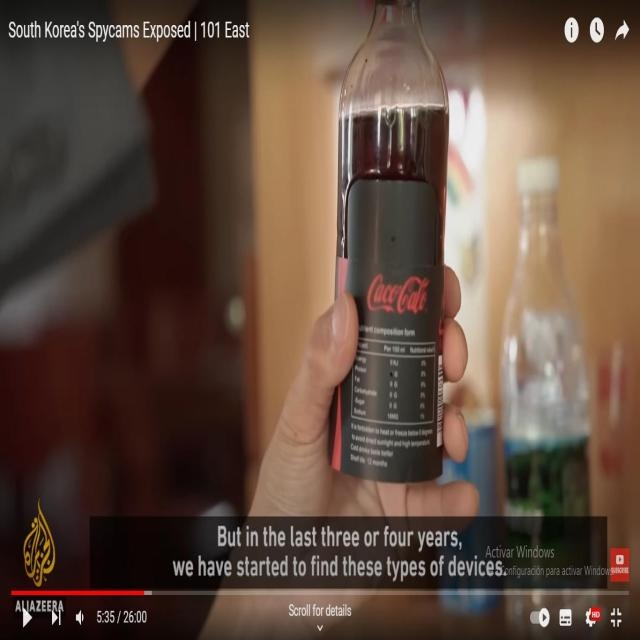

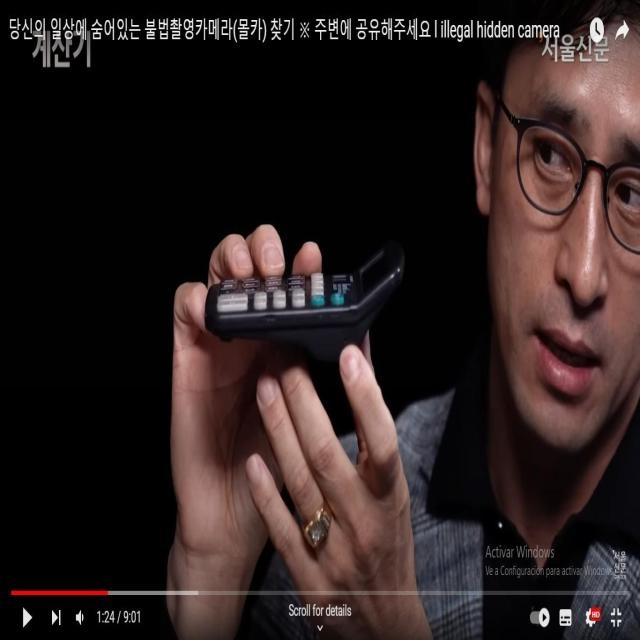

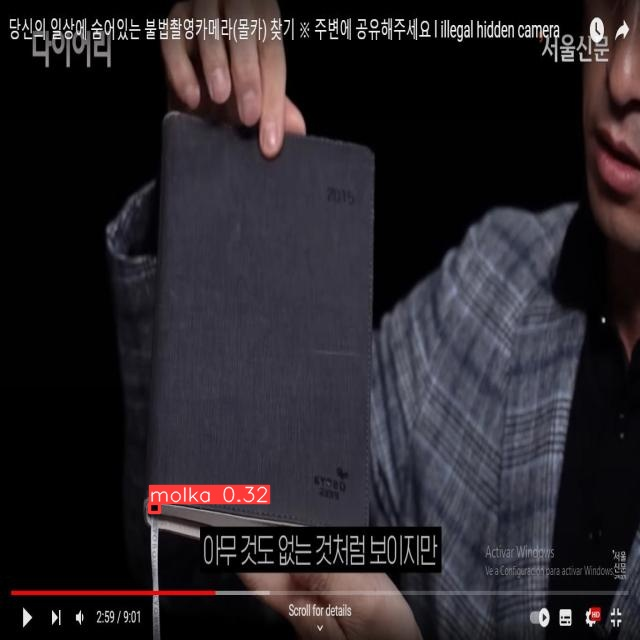

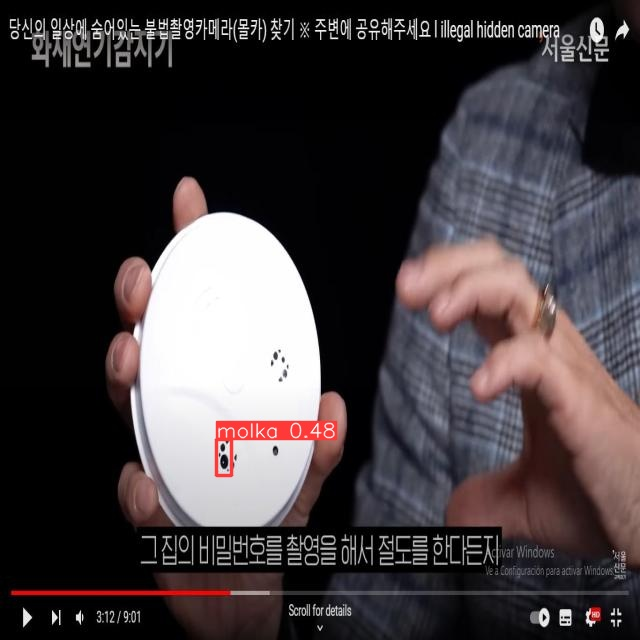

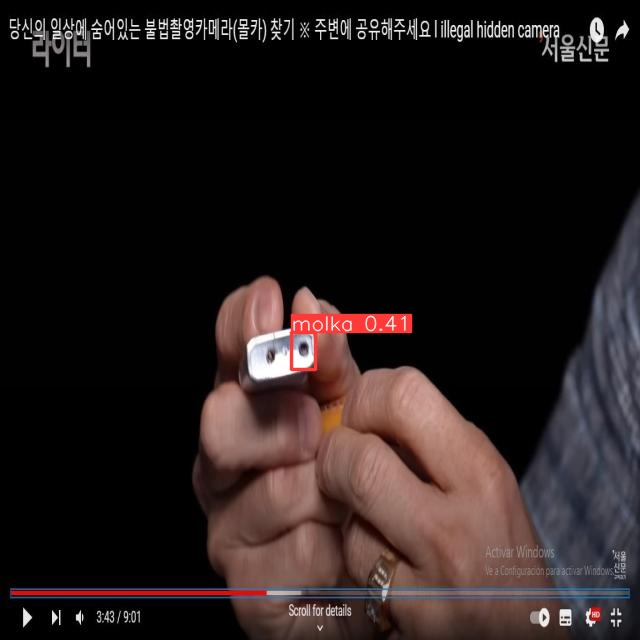

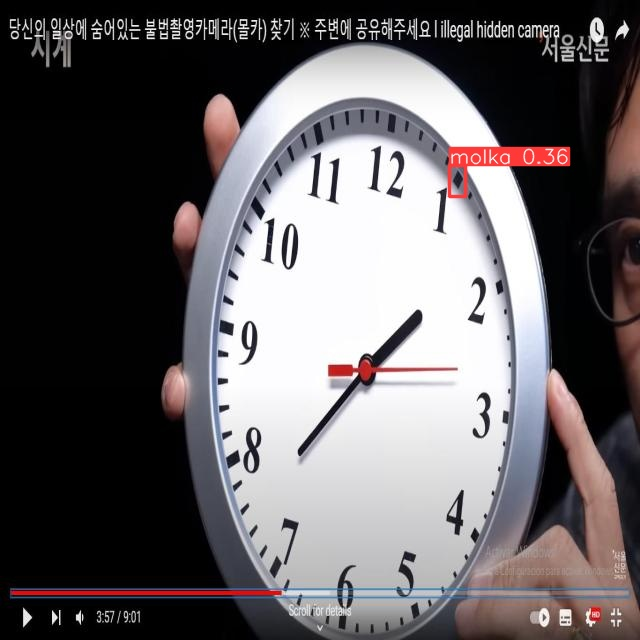

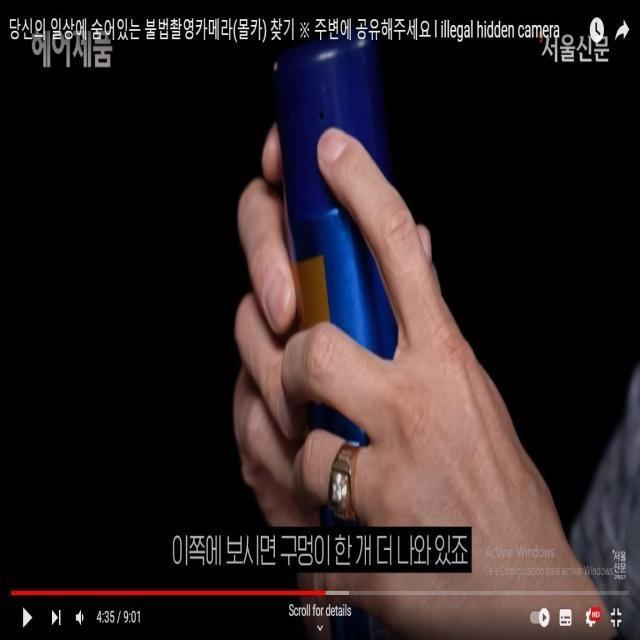

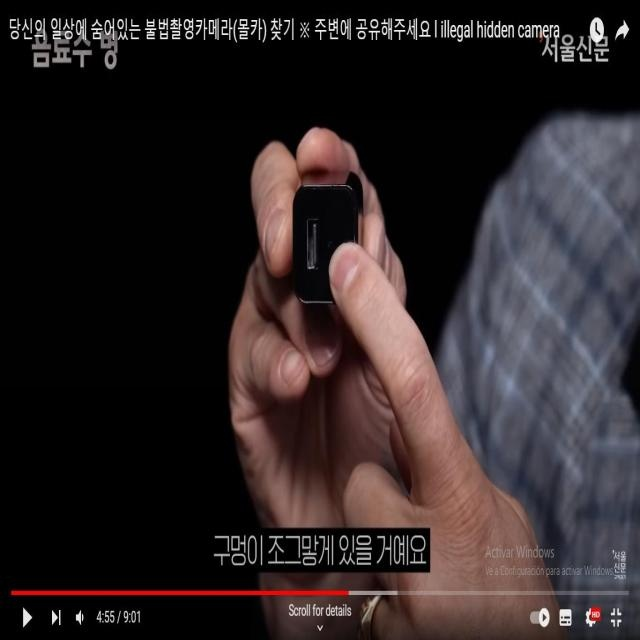

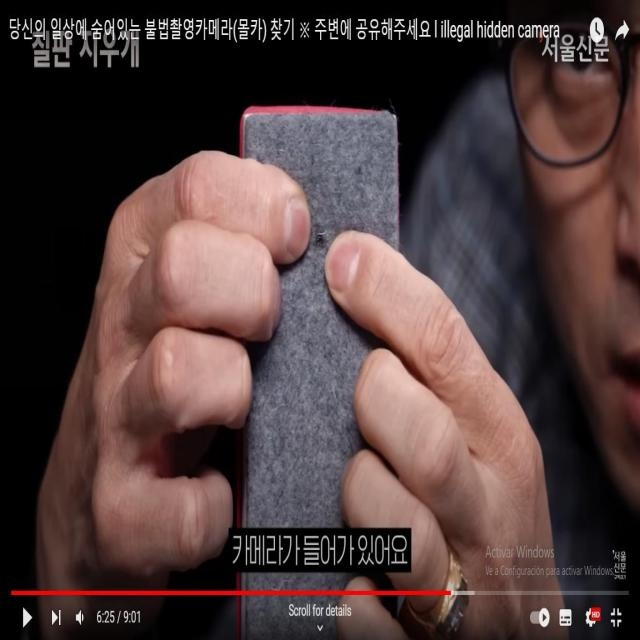

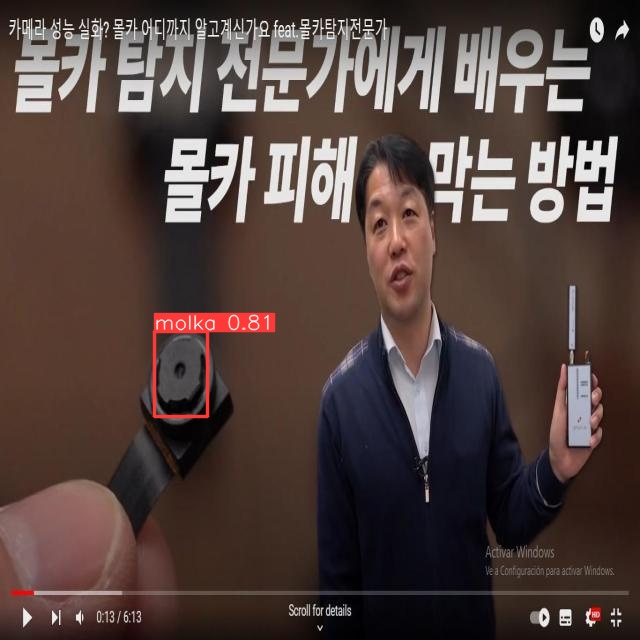

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/gdrive/MyDrive/molka3.2/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")